In [1]:
#code to load all of the csvs in filepath to one pandas df
import pandas as pd
import os
import sys
import tqdm
import matplotlib.pyplot as plt
root = sys.path[0]
filepath = os.path.join(root, "data/combined")
files = [os.path.join(filepath, file) for file in os.listdir(filepath)]
df = pd.DataFrame()
for file in tqdm.tqdm(files):
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        data['DMS_score'] = data['DMS_score'].astype(float)
        data['DMS_score'] = (data['DMS_score'] - data['DMS_score'].mean()) / data['DMS_score'].std()
        df = pd.concat([df, data], ignore_index=True)
        
df.head()


100%|██████████| 12/12 [00:04<00:00,  2.80it/s]


,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,V265M:D266A:G267E:V280Q,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,-0.188136,0
1,V265D:D266M:G267T:V280S,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,-0.213132,0
2,V265Q:D266A:G267W:V280N,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,-0.198717,0
3,D266V:G267M:V280H,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,-0.203497,0
4,V265F:D266I:G267T:V280K,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,-0.213132,0


In [2]:
def load_model_and_dataset(name: str):
    model=torch

DMS_score_bin
1    1013577
0     770353
Name: count, dtype: int64

In [3]:
df.describe()

,DMS_score,DMS_score_bin
count,1.783930e+06,1.783930e+06
mean,2.291431e-17,5.681708e-01
std,9.999969e-01,4.953311e-01
min,-1.170422e+01,0.000000e+00
25%,-8.808887e-01,0.000000e+00
50%,1.014257e-01,1.000000e+00
75%,8.305500e-01,1.000000e+00
max,4.831746e+01,1.000000e+00


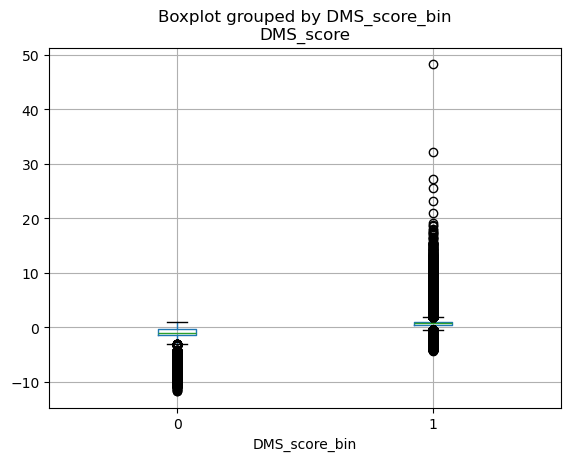

In [5]:
#box and whisker plot of DMS_score
df.boxplot(column = 'DMS_score', by = 'DMS_score_bin')
plt.show()

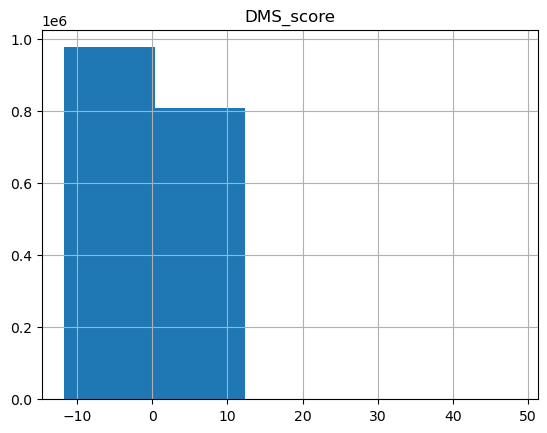

In [7]:
#histogram of Dms_score

df.hist(column='DMS_score', bins=5)
plt.show()


In [51]:
filepath = "/Clinical_ProteinGym_substitutions"
os.chdir(filepath)
files = os.listdir(filepath)
df = pd.DataFrame()
for file in files:
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        df = pd.concat([df, data], ignore_index=True)
        
df.head()


,Unnamed: 0,protein,protein_sequence,mutant,mutated_sequence,DMS_bin_score
0,43555,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,R327Q,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Benign
1,43556,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,A277E,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Pathogenic
2,43557,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,R275Q,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Pathogenic
3,43558,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,R275W,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Pathogenic
4,43559,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,G215S,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Benign


In [52]:
df.value_counts('DMS_bin_score')

DMS_bin_score
Pathogenic    32000
Benign        30727
Name: count, dtype: int64

In [8]:
import torch

In [11]:
chen_dataset = torch.load(f'{root}/data/datasets/Chen_train.pt')

In [13]:
chen_dataset.tensors

(tensor([[-0.1569, -0.2963,  0.3784,  ...,  0.6169,  0.0592, -0.1477],
         [-0.1646, -0.2887,  0.4140,  ...,  0.6036,  0.0710, -0.1320],
         [-0.1469, -0.2836,  0.3796,  ...,  0.5760,  0.0463, -0.1025],
         ...,
         [-0.1437, -0.2978,  0.4012,  ...,  0.5922,  0.0646, -0.1144],
         [-0.1730, -0.3039,  0.3847,  ...,  0.6103,  0.0581, -0.1427],
         [-0.1354, -0.2911,  0.3731,  ...,  0.5813,  0.0492, -0.1030]],
        device='cuda:0'),
 tensor([[1.0001],
         [0.4801],
         [0.4593],
         ...,
         [1.2028],
         [0.1441],
         [0.5663]]))

In [14]:
chen_emb = torch.load(f'{root}/data/embeddings/Chen_train_seq.pt')

In [15]:
chen_emb

tensor([[-0.1569, -0.2963,  0.3784,  ...,  0.6169,  0.0592, -0.1477],
        [-0.1646, -0.2887,  0.4140,  ...,  0.6036,  0.0710, -0.1320],
        [-0.1469, -0.2836,  0.3796,  ...,  0.5760,  0.0463, -0.1025],
        ...,
        [-0.1437, -0.2978,  0.4012,  ...,  0.5922,  0.0646, -0.1144],
        [-0.1730, -0.3039,  0.3847,  ...,  0.6103,  0.0581, -0.1427],
        [-0.1354, -0.2911,  0.3731,  ...,  0.5813,  0.0492, -0.1030]],
       device='cuda:0')

In [16]:
chen_model = torch.load(f'{root}/Rank-N-Contrast/save/Chen_models/RnC_Chen_RepEnc_ep_400_lr_0.5_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/curr_last.pth')

In [31]:
from rank_n_contrast.model import RepresentationEncoder
# Adapted from Rank-N-Contrast code

NAMED_MODEL_PATHS = {
    "chen": f"{root}/rank_n_contrast/save/Chen_models/RnC_Chen_RepEnc_ep_400_lr_0.5_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/curr_last.pth",
    "olson": f"{root}/rank_n_contrast/save/Olson_models/RnC_Olson_RepEnc_ep_200_lr_0.0003_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/curr_last.pth",
    "tsuboyama": f"{root}/rank_n_contrast/save/Tsuboyama_models/RnC_Tsuboyama_RepEnc_ep_400_lr_0.5_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/ckpt_epoch_100.pth"
}

def set_model(name: str = "chen"):
    model = RepresentationEncoder()

    if torch.cuda.is_available():
        if torch.cuda.device_count() > 1:
            model.encoder = torch.nn.DataParallel(model.encoder)
        model = model.cuda()
        torch.backends.cudnn.benchmark = True
    model_state_dict= torch.load(NAMED_MODEL_PATHS[name])
    model.load_state_dict(model_state_dict['model'])

    return model

In [36]:
def load_dataset_embedding_and_model(name: str, train: bool = True):
    model = set_model(name)
    if train:
        dataset = torch.load(f'{root}/data/datasets/{name.title()}_train.pt')
        embedding = torch.load(f'{root}/data/embeddings/{name.title()}_train_seq.pt')
    else:
        dataset = torch.load(f'{root}/data/datasets/{name.title()}_test.pt')
        embedding = torch.load(f'{root}/data/embeddings/{name.title()}_test_seq.pt')
    return dataset, embedding, model

In [37]:
dataset, emb, model = load_dataset_embedding_and_model("chen")

In [38]:
dataset.tensors

(tensor([[-0.1569, -0.2963,  0.3784,  ...,  0.6169,  0.0592, -0.1477],
         [-0.1646, -0.2887,  0.4140,  ...,  0.6036,  0.0710, -0.1320],
         [-0.1469, -0.2836,  0.3796,  ...,  0.5760,  0.0463, -0.1025],
         ...,
         [-0.1437, -0.2978,  0.4012,  ...,  0.5922,  0.0646, -0.1144],
         [-0.1730, -0.3039,  0.3847,  ...,  0.6103,  0.0581, -0.1427],
         [-0.1354, -0.2911,  0.3731,  ...,  0.5813,  0.0492, -0.1030]],
        device='cuda:0'),
 tensor([[1.0001],
         [0.4801],
         [0.4593],
         ...,
         [1.2028],
         [0.1441],
         [0.5663]]))

In [40]:
emb-dataset.tensors[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')